<a href="https://colab.research.google.com/github/Twenkid/Colab-Notebooks-AI-ML-CV/blob/main/interactive_example_clEsperanto-incomplete-11-5-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyclesperanto_prototype ipywidgets numpy_image_widget # numpy==1.19

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.0/624.0 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 724.6/724.6 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, 

In [2]:
import pyclesperanto_prototype as cle

cle.get_device()

<Tesla T4 on Platform: NVIDIA CUDA (1 refs)>

In [12]:
from skimage.io import imread

image = cle.push(imread('https://samples.fiji.sc/blobs.png'))
image.shape


(1, 254, 256)

cl.OCLArray([[[ 40.,  32.,  24., ..., 216., 200., 200.],
        [ 56.,  40.,  24., ..., 232., 216., 216.],
        [ 64.,  48.,  24., ..., 240., 232., 232.],
        ...,
        [ 72.,  80.,  80., ...,  48.,  48.,  48.],
        [ 80.,  80.,  80., ...,  48.,  48.,  48.],
        [ 96.,  88.,  80., ...,  48.,  48.,  48.]]], dtype=float32)
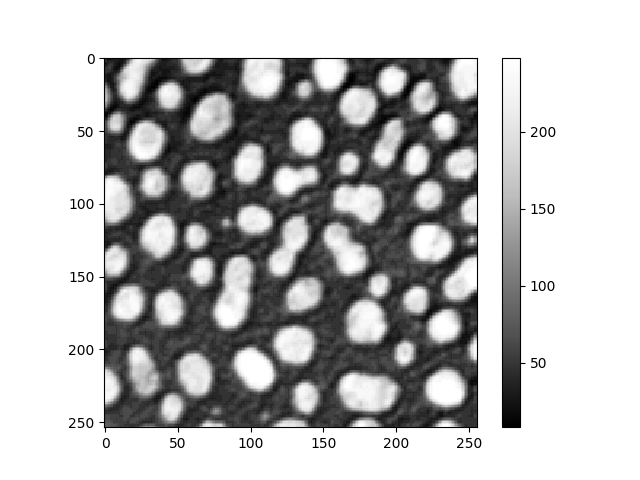
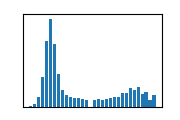

In [14]:
image

The following function represents a image processing workflow using clesperanto.

In [15]:
def process_image(sigma : float):
    blurred = cle.gaussian_blur(image, sigma_x=sigma, sigma_y=sigma)
    binary = cle.threshold_otsu(blurred)
    labels = cle.connected_components_labeling_box(binary)
    return cle.maximum_images(image, cle.detect_label_edges(labels) * 255)

We will now add a simple graphical user interface for tuning parameters of the specified workflow above.

In [7]:
#%pip uninstall numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4


In [8]:
#%pip install numpy==1.19


  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [16]:
import ipywidgets as widgets
import numpy_image_widget as niw

In [17]:
# Add an image viewer
blob_view = niw.NumpyImage(image)
blob_view

TypeError: Cannot handle this data type: (1, 1, 256), |u1

In [18]:
# setup user interface for changing the sigma
slider = widgets.FloatSlider(value=1, min=0, max=10)

# event handler when the user changed something:
def configuration_updated(event):
    blob_view.data = process_image(slider.value)

# connect user interface with event
slider.observe(configuration_updated)

# execute action once to update the viewer
configuration_updated(None)

slider

NameError: name 'blob_view' is not defined